In [1]:
import numpy as np
import matplotlib.pyplot as plt
from few.waveform import GenerateEMRIWaveform, FastSchwarzschildEccentricFlux, FastKerrEccentricEquatorialFlux
from few.utils.constants import Gpc, MRSUN_SI, YRSID_SI
from typing import Optional, Union, Callable
from tqdm import tqdm

#try:
#    import cupy as cp
#    use_gpu = True
#except ImportError():
#    print("Not on GPU")
#    use_gpu = False

use_gpu = True

from stableemrifisher.fisher.fisher import StableEMRIFisher
from stableemrifisher.utils import inner_product

from fastlisaresponse import ResponseWrapper  # Response function 
from lisatools.detector import EqualArmlengthOrbits
from lisatools.sensitivity import get_sensitivity, A1TDISens, E1TDISens, T1TDISens

if not use_gpu:
    
    import few
    
    #tune few configuration
    cfg_set = few.get_config_setter(reset=True)
    
    cfg_set.enable_backends("cpu")
    cfg_set.set_log_level("info");
    force_backend = 'cpu'
else:
    force_backend = 'gpu'
    pass #let the backend decide for itself.

startup


/home/shubham/miniconda3/envs/SKeqfull/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
#waveform class setup
waveform_class = FastSchwarzschildEccentricFlux
waveform_class_kwargs = dict(inspiral_kwargs=dict(err=1e-11,),
                             mode_selector_kwargs=dict(mode_selection_threshold=1e-5))

#waveform generator setup
waveform_generator = GenerateEMRIWaveform
waveform_generator_kwargs = dict(return_list=False)

#ResponseWrapper setup
ResponseWrapper = ResponseWrapper
tdi_gen ="1st generation"# "2nd generation"#
order = 20  # interpolation order (should not change the result too much)
tdi_kwargs_esa = dict(
    orbits=EqualArmlengthOrbits(use_gpu=use_gpu), order=order, tdi=tdi_gen, tdi_chan="AE",
)  # could do "AET"
index_lambda = 8
index_beta = 7
# with longer signals we care less about this
t0 = 10000.0  # throw away on both ends when our orbital information is weird
T = 0.1
dt = 10.0

ResponseWrapper_kwargs = dict(
    #waveform_gen=waveform_generator,
    Tobs = T,
    dt = dt,
    index_lambda = index_lambda,
    index_beta = index_beta,
    t0 = t0,
    flip_hx = True,
    use_gpu=use_gpu,
    is_ecliptic_latitude=False,
    remove_garbage="zero",
    **tdi_kwargs_esa
)

#noise setup
channels = [A1TDISens, E1TDISens]
noise_model = get_sensitivity
noise_kwargs = [{"sens_fn": channel_i} for channel_i in channels]

In [3]:
sef = StableEMRIFisher(waveform_class=waveform_class, 
                       waveform_class_kwargs=waveform_class_kwargs,
                       waveform_generator=waveform_generator,
                       waveform_generator_kwargs=waveform_generator_kwargs,
                       ResponseWrapper=ResponseWrapper, ResponseWrapper_kwargs=ResponseWrapper_kwargs,
                       noise_model=noise_model, noise_kwargs=noise_kwargs, channels=channels,
                      stats_for_nerds = True, use_gpu = use_gpu,
                       T=T, dt=dt,
                      deriv_type='stable')

In [5]:
m1 = 1e6
m2 = 1e1
a = 0.
p0 = 9.5
e0 = 0.4
xI0 = 1.0
dist = 0.1
qS = np.pi/3
phiS = np.pi/4
qK = np.pi/6
phiK = np.pi/8
Phi_phi0 = 1.0
Phi_theta0 = 0.0
Phi_r0 = 0.0

pars_list = [m1, m2, a, p0, e0, xI0, dist, qS, phiS, qK, phiK, Phi_phi0, Phi_theta0, Phi_r0]

emri_kwargs = {"T":T, "dt":dt}

sef.SNRcalc_SEF(*pars_list,**emri_kwargs, use_gpu=use_gpu)

wave ndim: 2
Computing SNR for parameters: (1000000.0, 10.0, 0.0, 9.5, 0.4, 1.0, 0.1, 1.0471975511965976, 0.7853981633974483, 0.5235987755982988, 0.39269908169872414, 1.0, 0.0, 0.0)


np.float64(155.52019009221254)

Body is not plunging, Fisher should be stable.
wave ndim: 2
Computing SNR for parameters: (1000000.0, 10.0, 0.0, 9.5, 0.4, 1.0, 0.1, 1.0471975511965976, 0.7853981633974483, 0.5235987755982988, 0.39269908169872414, 1.0, 0.0, 0.0)
Waveform Generated. SNR: 155.52019009221254
calculating stable deltas...
Gamma_ii for m1: 46.42598060974581
Gamma_ii for m1: 46.42598060953024
Gamma_ii for m1: 46.42598061031259
Gamma_ii for m1: 46.42598060171842
Gamma_ii for m1: 46.42598053449736
Gamma_ii for m1: 46.425980135123766
Gamma_ii for m1: 46.42598333390003
Gamma_ii for m1: 46.425989757384386
[np.float64(4.643185827089423e-12), np.float64(1.6851559716161013e-11), np.float64(1.8511554515452006e-10), np.float64(1.4479189920709186e-09), np.float64(8.60237298473043e-09), np.float64(6.890056026450502e-08), np.float64(1.383596643027314e-07)]
0


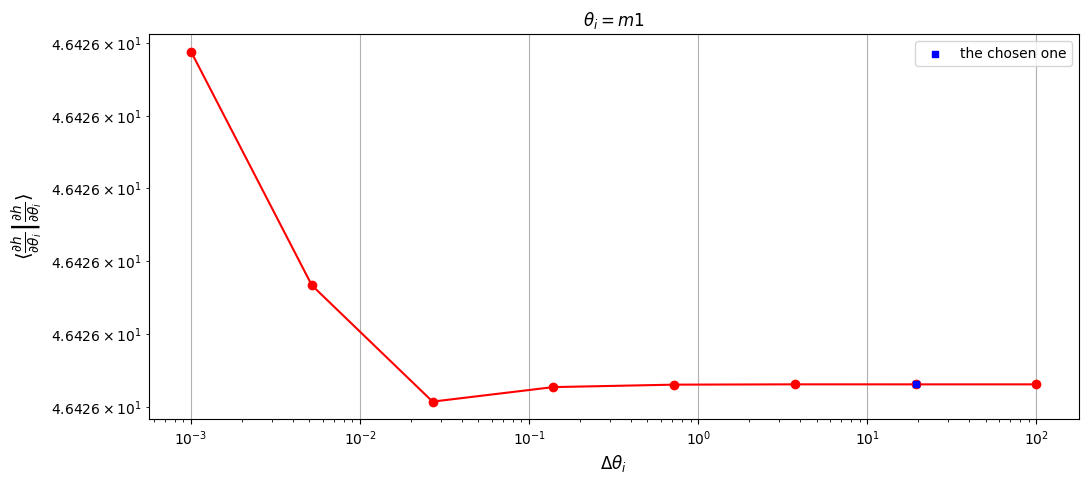

Gamma_ii for m2: 52790502.12052001
Gamma_ii for m2: 52790502.1008688
Gamma_ii for m2: 52790502.09671544
Gamma_ii for m2: 52790502.09717958
Gamma_ii for m2: 52790502.039582394
Gamma_ii for m2: 52790502.08178729
Gamma_ii for m2: 52790503.80719131
Gamma_ii for m2: 52790509.68271207
[np.float64(3.7224900344086065e-10), np.float64(7.867619725359635e-11), np.float64(8.791996663168071e-12), np.float64(1.0910519973443483e-09), np.float64(7.99478930131681e-10), np.float64(3.268398480199965e-08), np.float64(1.1129880718418121e-07)]
2


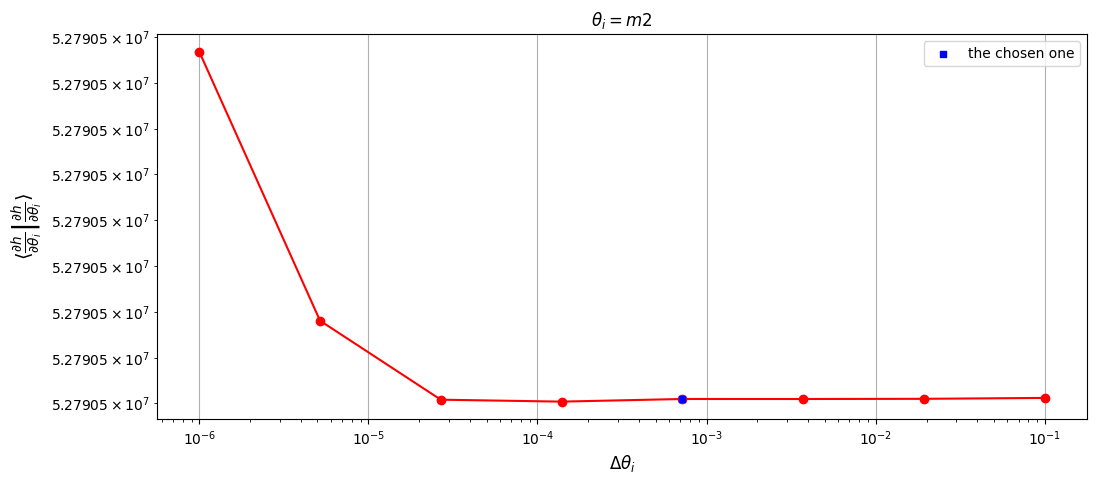

Gamma_ii for p0: 846385726950.064
Gamma_ii for p0: 846386267684.4685
Gamma_ii for p0: 846386291295.5552
Gamma_ii for p0: 846386300644.515
Gamma_ii for p0: 846385957538.1001
Gamma_ii for p0: 846386691276.6138
Gamma_ii for p0: 846382516004.4752
Gamma_ii for p0: 846425261721.9677
[np.float64(6.388742648440518e-07), np.float64(2.789634817192114e-08), np.float64(1.1045736245669436e-08), np.float64(4.053781987534301e-07), np.float64(8.669069601805407e-07), np.float64(4.9330793814835e-06), np.float64(5.050146708224392e-05)]
2


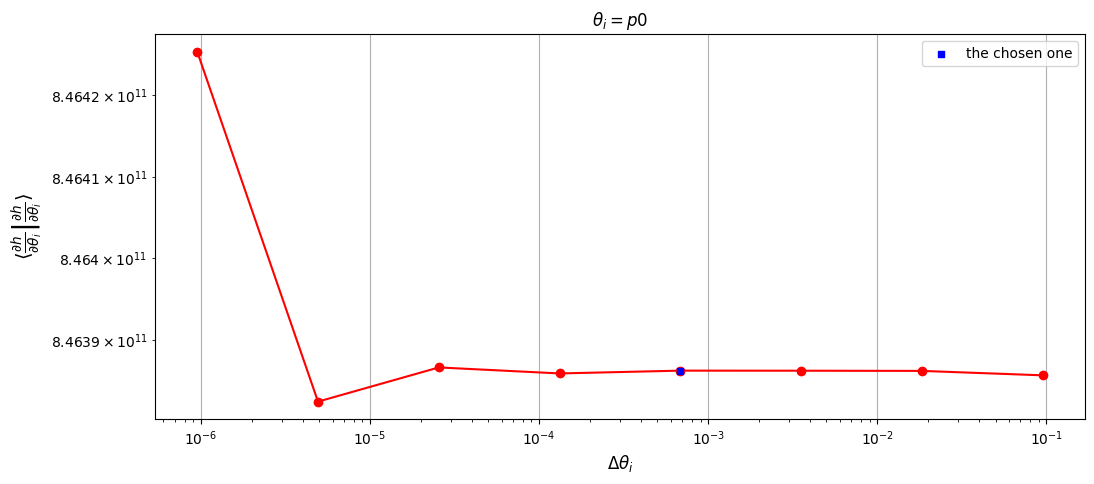

Gamma_ii for e0: 44657376369226.31
Gamma_ii for e0: 44657133104297.29
Gamma_ii for e0: 44657142493970.95
Gamma_ii for e0: 44657148515102.875
Gamma_ii for e0: 44657188199182.77
Gamma_ii for e0: 44657154977434.89
Gamma_ii for e0: 44656286348158.81
Gamma_ii for e0: 44653055467522.1
[np.float64(5.447392434603655e-06), np.float64(2.1026140813488404e-07), np.float64(1.3483019230031395e-07), np.float64(8.886381229699482e-07), np.float64(7.439288933564921e-07), np.float64(1.945144451345401e-05), np.float64(7.235519726216456e-05)]
2


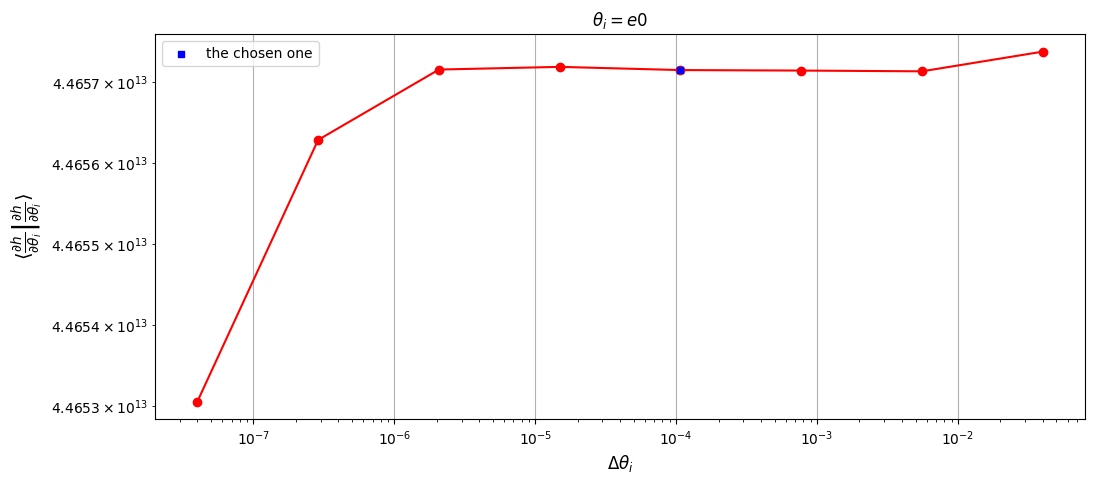

Gamma_ii for qS: 345431.50721693784
Gamma_ii for qS: 336435.1478931464
Gamma_ii for qS: 336651.3911760213
Gamma_ii for qS: 336681.3489651782
Gamma_ii for qS: 336676.7832728967
Gamma_ii for qS: 336676.4740773897
Gamma_ii for qS: 336676.0998828595
Gamma_ii for qS: 336692.32544673857
[np.float64(0.02674024809871754), np.float64(0.0006423359253604418), np.float64(8.897965167644438e-05), np.float64(1.3561054721632354e-05), np.float64(9.183757429860404e-07), np.float64(1.1114377596696064e-06), np.float64(4.819107135138231e-05)]
4


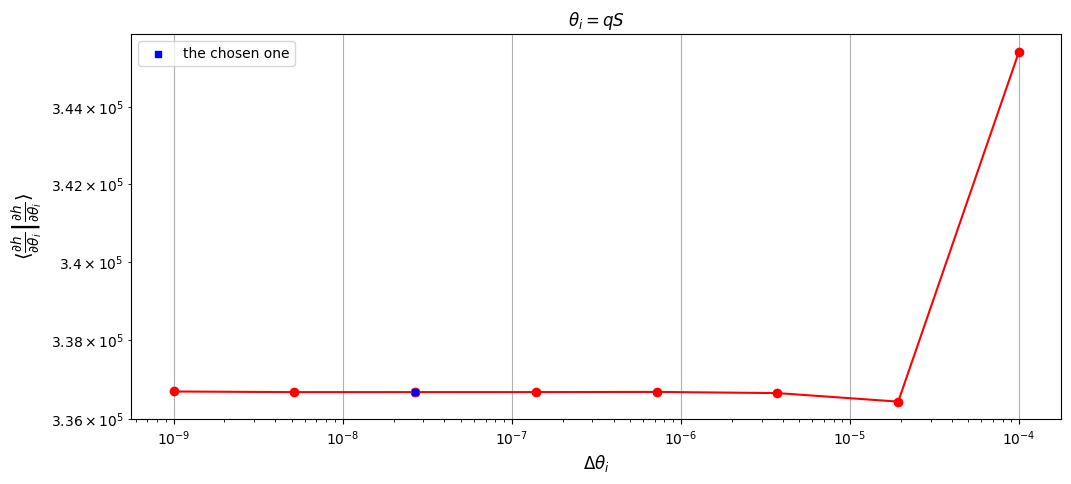

Gamma_ii for phiS: 230413.23326139816
Gamma_ii for phiS: 230434.96873018518
Gamma_ii for phiS: 230586.09427455772
Gamma_ii for phiS: 230590.7069282521
Gamma_ii for phiS: 230580.07615448837
Gamma_ii for phiS: 230582.0871701041
Gamma_ii for phiS: 230584.05821293461
Gamma_ii for phiS: 230580.23928825263
[np.float64(9.432365628705706e-05), np.float64(0.0006553974767992476), np.float64(2.0003640891793325e-05), np.float64(4.6104476765818635e-05), np.float64(8.721473729368596e-06), np.float64(8.548044673174916e-06), np.float64(1.656223748301309e-05)]
5


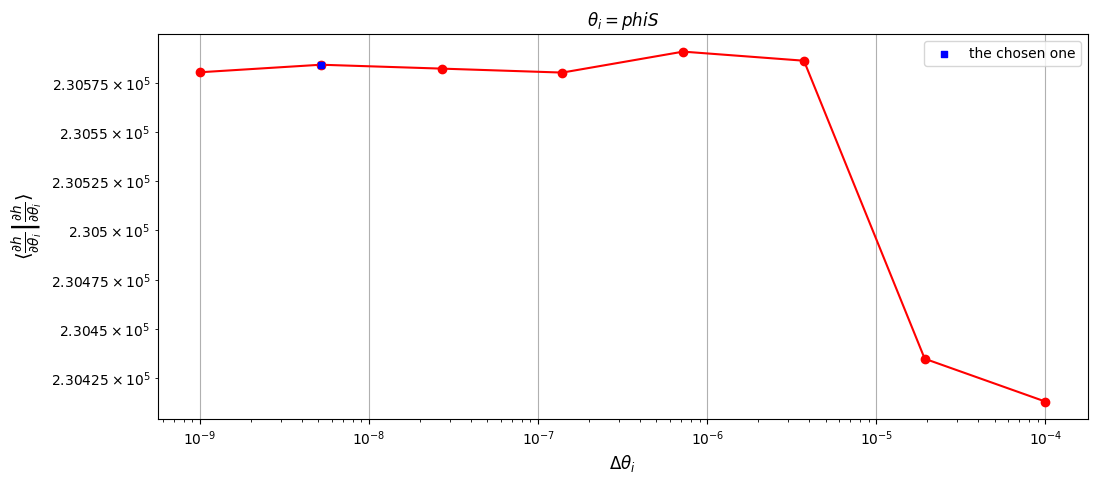

Gamma_ii for qK: 123610.55897377193
Gamma_ii for qK: 123610.55897184569
Gamma_ii for qK: 123610.55898170591
Gamma_ii for qK: 123610.5590314577
Gamma_ii for qK: 123610.55888259533
Gamma_ii for qK: 123610.55926341702
Gamma_ii for qK: 123610.55253633657
Gamma_ii for qK: 123610.53520963532
[np.float64(1.5583110656571433e-11), np.float64(7.976840950240471e-11), np.float64(4.024881915157504e-10), np.float64(1.2042852070370715e-09), np.float64(3.080818405732597e-09), np.float64(5.44215708522554e-08), np.float64(1.4017171941257742e-07)]
0


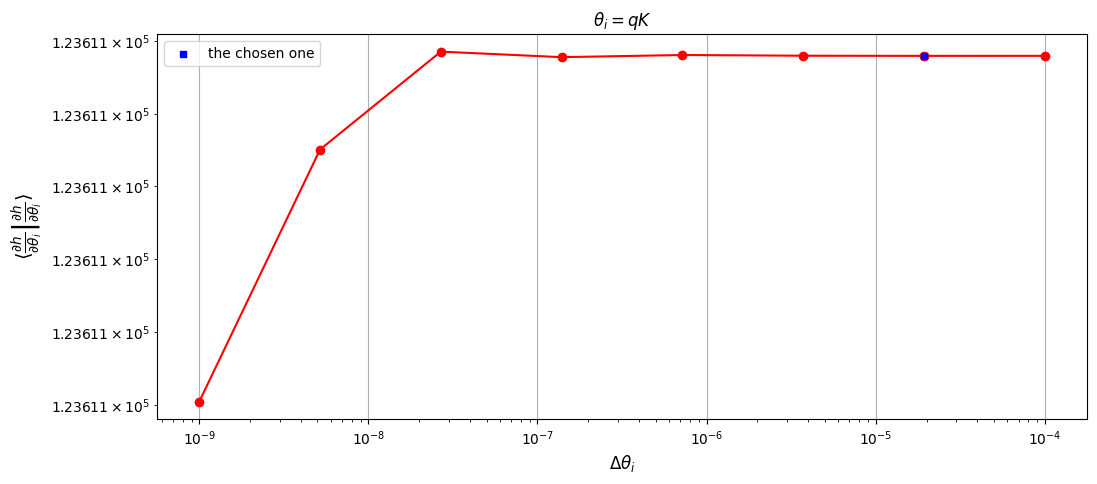

Gamma_ii for phiK: 51910.86036806429
Gamma_ii for phiK: 51910.86036831306
Gamma_ii for phiK: 51910.860363592794
Gamma_ii for phiK: 51910.86038362917
Gamma_ii for phiK: 51910.86048391757
Gamma_ii for phiK: 51910.86042205183
Gamma_ii for phiK: 51910.864421012244
Gamma_ii for phiK: 51910.859476165315
[np.float64(4.7921569602953475e-12), np.float64(9.093016215151738e-11), np.float64(3.8597663638700115e-10), np.float64(1.931934737179152e-09), np.float64(1.1917686474949818e-09), np.float64(7.703513429401325e-08), np.float64(9.5256502760529e-08)]
0


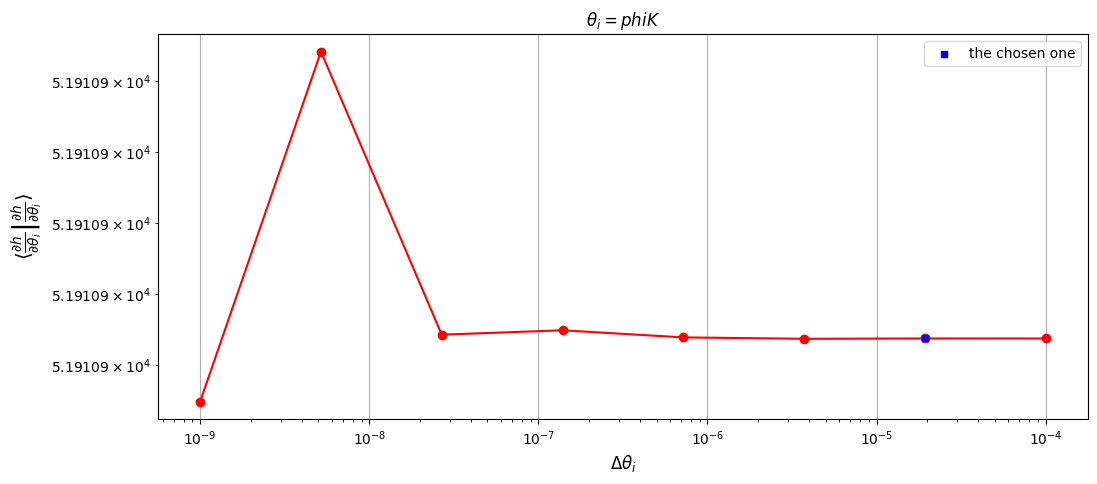

stable deltas: {'m1': 19.306977288832496, 'm2': 0.0007196856730011522, 'p0': 0.000683701389351095, 'e0': 0.00010730783181118912, 'dist': 0.0, 'qS': 2.682695795279727e-08, 'phiS': 5.179474679231223e-09, 'qK': 1.9306977288832496e-05, 'phiK': 1.9306977288832496e-05, 'Phi_phi0': 0.0, 'Phi_r0': 0.0}
Time taken to compute stable deltas is 33.12788438796997 seconds
calculating Fisher matrix...
Finished derivatives
Calculated Fisher is *atleast* positive-definite.
Time taken to compute FM is 3.6556804180145264 seconds


In [6]:
m1 = 1e6
m2 = 1e1
a = 0.
p0 = 9.5
e0 = 0.4
xI0 = 1.0
dist = 0.1
qS = np.pi/3
phiS = np.pi/4
qK = np.pi/6
phiK = np.pi/8
Phi_phi0 = 1.0
Phi_theta0 = 0.0
Phi_r0 = 0.0

pars_list = [m1, m2, a, p0, e0, xI0, dist, qS, phiS, qK, phiK, Phi_phi0, Phi_theta0, Phi_r0]
wave_params = dict(
    m1=m1,
    m2=m2,
    a=a,
    p0=p0,
    e0=e0,
    xI0=xI0,
    dist=dist,
    qS=qS,
    phiS=phiS,
    qK=qK,
    phiK=phiK,
    Phi_phi0=Phi_phi0,
    Phi_theta0=Phi_theta0,
    Phi_r0=Phi_r0
)

param_names = ['m1','m2','p0','e0','dist','qS','phiS','qK','phiK','Phi_phi0','Phi_r0']

der_order = 4
Ndelta = 8
stability_plot = True

delta_range = dict(
    m1 = np.geomspace(1e-4*m1, 1e-9*m1, Ndelta),
    m2 = np.geomspace(1e-2*m2, 1e-7*m2, Ndelta),
    p0 = np.geomspace(1e-2*p0, 1e-7*p0, Ndelta),
    e0 = np.geomspace(1e-1*e0, 1e-7*e0, Ndelta),
    qS = np.geomspace(1e-4,    1e-9,    Ndelta),
    phiS = np.geomspace(1e-4,    1e-9,    Ndelta),
    qK = np.geomspace(1e-4,    1e-9,    Ndelta),
    phiK = np.geomspace(1e-4,    1e-9,    Ndelta),
)

Fisher = sef(wave_params=wave_params, param_names = param_names, 
             der_order = der_order, 
             Ndelta = Ndelta, 
             stability_plot = stability_plot,
             delta_range = delta_range,
            live_dangerously = False)

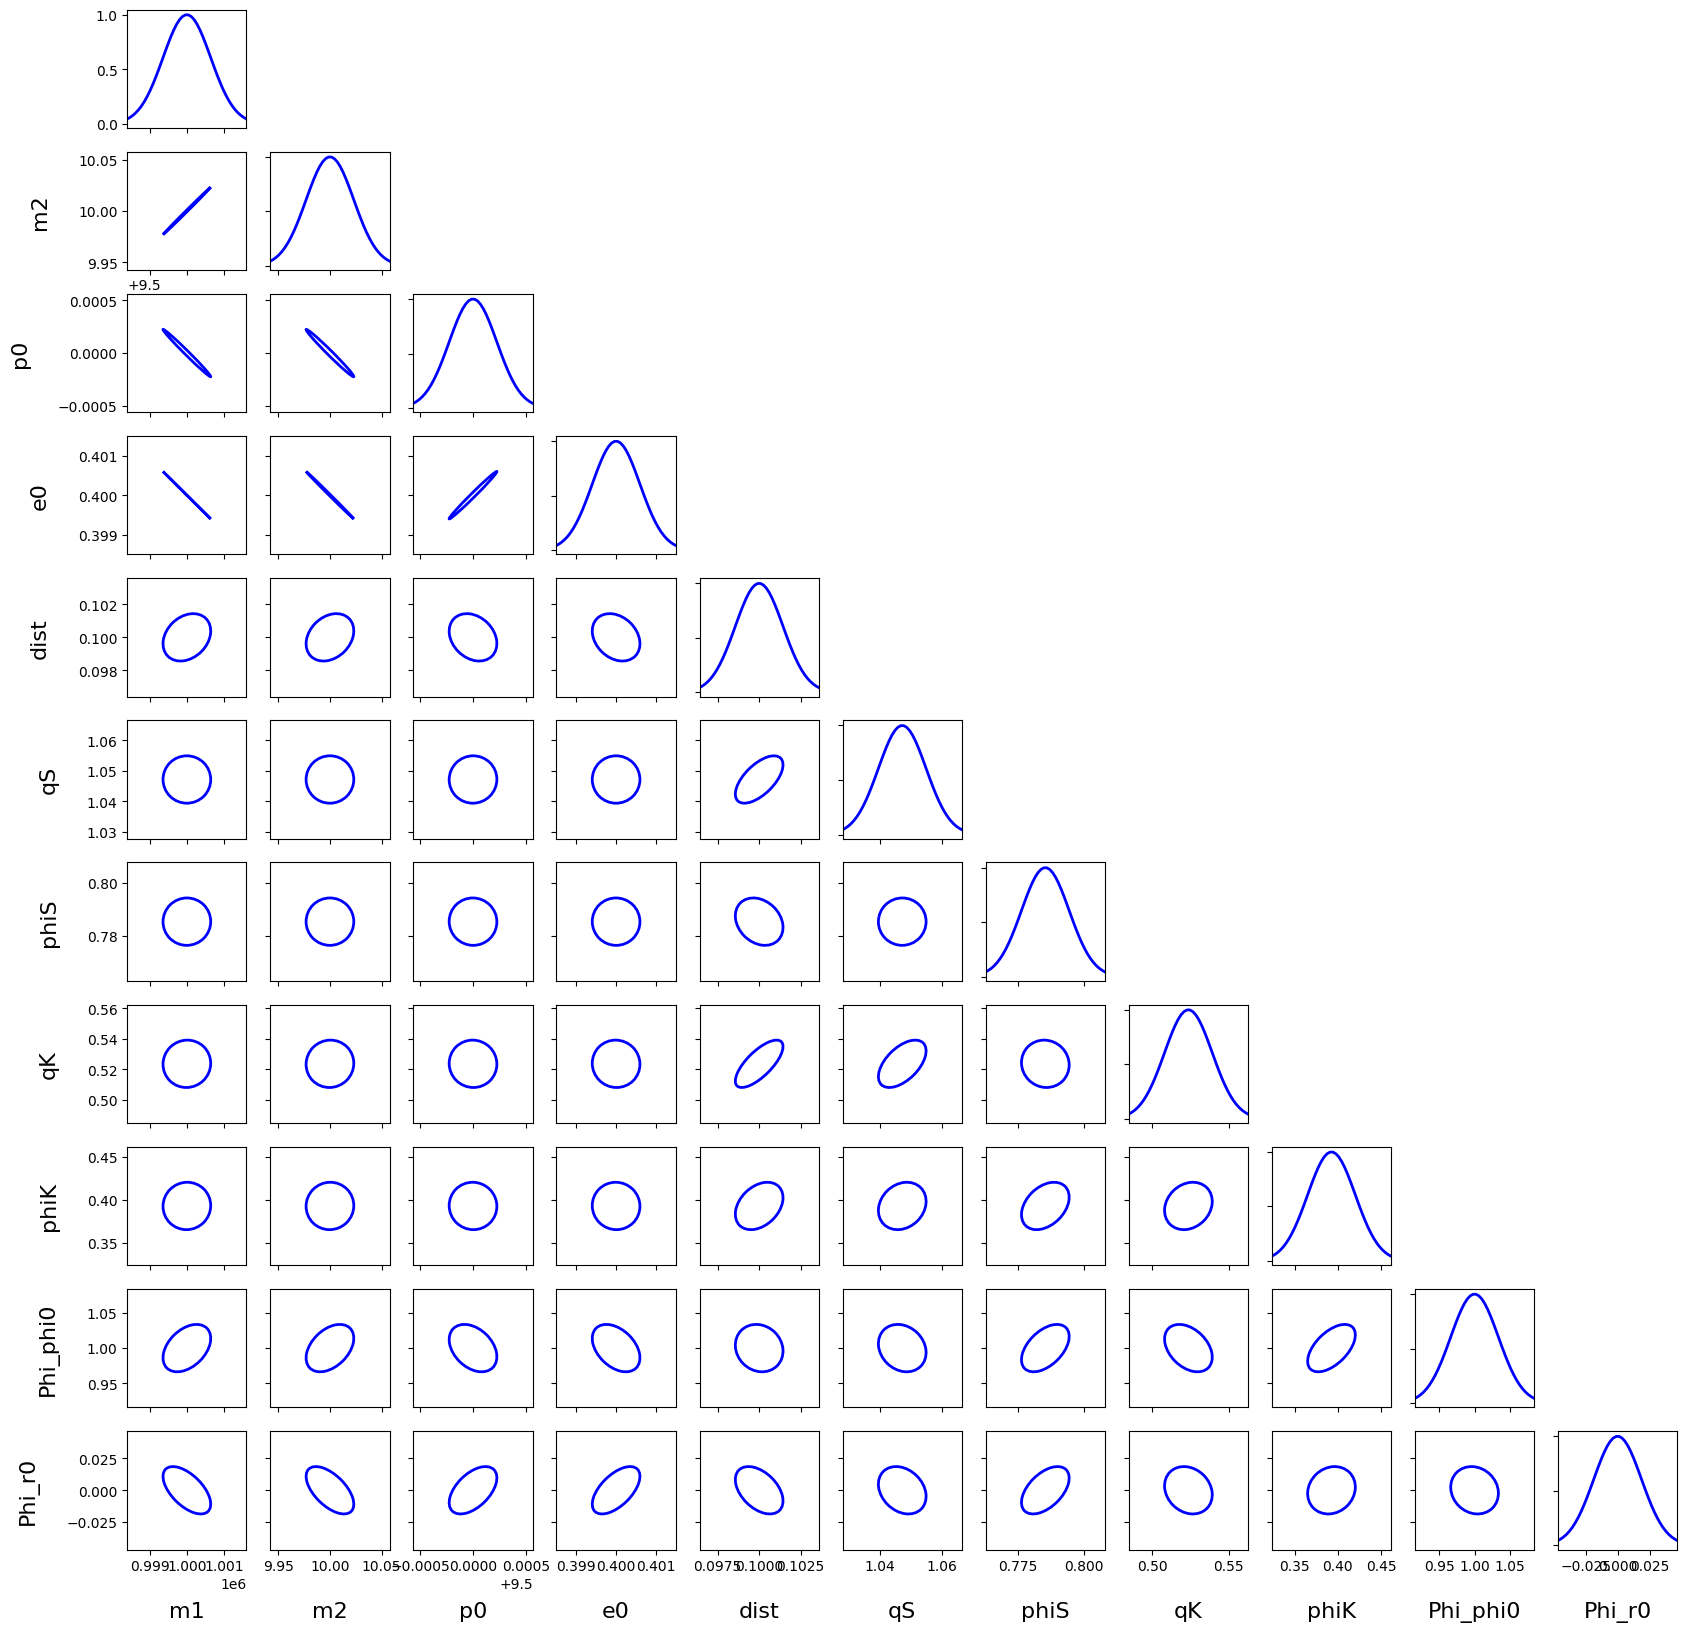

In [7]:
from stableemrifisher.plot import CovEllipsePlot

covariance = np.linalg.inv(Fisher)

ellipse_kwargs = dict(facecolor='None', edgecolor='b', lw=2)
line_kwargs = dict(lw=2, color='b')

fig, axs = plt.subplots(len(covariance),len(covariance), figsize=(20,20))
fig, axs = CovEllipsePlot(covariance, wave_params=wave_params, param_names=param_names, fig=fig, axs=axs, ellipse_kwargs=ellipse_kwargs, line_kwargs=line_kwargs)